In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ori_data = pd.read_csv("RV.txt",skiprows=22,sep=r'\s+',names=['BJD','RVel','e_RVel','SHK','e_SHK','tel'])
ori_data

,BJD,RVel,e_RVel,SHK,e_SHK,tel
0,2.457760e+06,-1.38,1.72,1.085,0.001,1.0
1,2.457760e+06,4.83,1.57,1.058,0.001,1.0
2,2.457760e+06,7.16,1.55,1.144,0.001,1.0
3,2.457764e+06,-13.31,1.55,1.047,0.001,1.0
4,2.457765e+06,-2.94,1.50,1.221,0.001,1.0
...,...,...,...,...,...,...
86,2.456446e+06,13.69,10.53,2.000,NaN,NaN
87,2.456454e+06,-10.36,9.34,2.000,NaN,NaN
88,2.456482e+06,-7.06,9.81,2.000,NaN,NaN
89,2.456486e+06,-29.01,9.04,2.000,NaN,NaN


In [3]:
coralie_data = ori_data[np.isnan(ori_data['tel'])].copy()
hires_data = ori_data[~np.isnan(ori_data['tel'])].copy()
coralie_data['Label'] = 'CORALIE'
hires_data['Label'] = 'HIRES'
coralie_data = coralie_data[['BJD','RVel','e_RVel','Label']]
hires_data = hires_data[['BJD','RVel','e_RVel','Label']]
data = pd.concat([hires_data,coralie_data])
data

,BJD,RVel,e_RVel,Label
0,2.457760e+06,-1.38,1.72,HIRES
1,2.457760e+06,4.83,1.57,HIRES
2,2.457760e+06,7.16,1.55,HIRES
3,2.457764e+06,-13.31,1.55,HIRES
4,2.457765e+06,-2.94,1.50,HIRES
...,...,...,...,...
86,2.456446e+06,13.69,10.53,CORALIE
87,2.456454e+06,-10.36,9.34,CORALIE
88,2.456482e+06,-7.06,9.81,CORALIE
89,2.456486e+06,-29.01,9.04,CORALIE


In [4]:
def RV_Pre(t, rvdot, a, b):
    return rvdot * (t - a) + b

In [5]:
t = np.linspace(data['BJD'].min(), data['BJD'].max(), 10000)
rvdot = -0.12226591465875723
rv_pre = np.array([RV_Pre(t[i], rvdot, data['BJD'].mean(), 0) for i in range(len(t))])

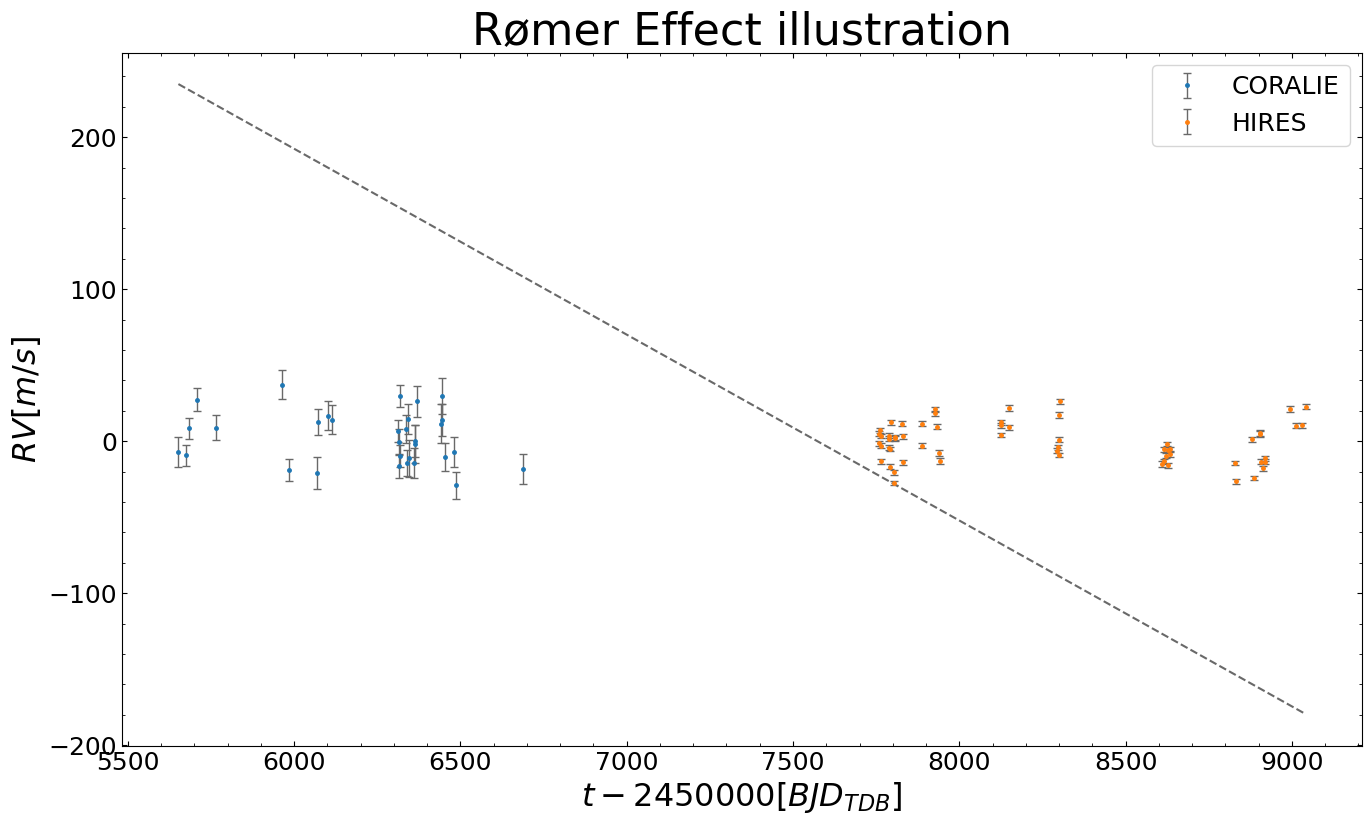

In [6]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.errorbar(coralie_data['BJD']-2450000,coralie_data['RVel'],yerr=coralie_data['e_RVel'],fmt='.',label='CORALIE',ms=5,ecolor='dimgray',elinewidth=1,capsize=3)
ax.errorbar(hires_data['BJD']-2450000,hires_data['RVel'],yerr=hires_data['e_RVel'],fmt='.',label='HIRES',ms=5,ecolor='dimgray',elinewidth=1,capsize=3)
ax.plot(t-2450000,rv_pre,ls='--',color='dimgray',lw=1.5)
ax.legend(fontsize=18)
ax.set_xlabel(r'$t-2450000[BJD_{TDB}]$',fontsize=23)
ax.set_ylabel(r'$RV[m/s]$',fontsize=23)
ax.set_title('Rømer Effect illustration',fontsize=32)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.minorticks_on()
ax.tick_params(axis='both', which='both', direction='in', labelsize=18)
plt.savefig('RV_illustration.png',dpi=300)
plt.savefig('RV_illustration.pdf',dpi=600)